In [21]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from contractions import contractions_dict
contractions.add("n't", "not")
contractions.add("nt", "not")
import string
punctuation_string = string.punctuation
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time as t
import sklearn.metrics as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from jsondataset import files_in_directory
from pickle import dump
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.preprocessing import label_binarize
## for explainer
from lime import lime_text

In [22]:
df = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/cleaned_tweets_validation.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   polarity    4754 non-null   object
 1   tweet       4754 non-null   object
 2   nltk_texts  4754 non-null   object
dtypes: object(3)
memory usage: 111.5+ KB


In [24]:
df.dropna()

,polarity,tweet,nltk_texts
0,neutral,accord run company plan move production russia...,"<Text: According to Gran , the company has no...>"
1,neutral,technopoli plan develop stage area less square...,<Text: Technopolis plans to develop in stages ...
2,negative,international electronic industry company elco...,<Text: The international electronic industry c...
3,positive,new production plant company would increase ca...,<Text: With the new production plant the compa...
4,positive,accord company s update strategy year aware ta...,<Text: According to the company 's updated str...
...,...,...,...
4749,negative,london marketwatch share price end low london ...,<Text: LONDON MarketWatch -- Share prices ende...
4750,neutral,rinkuskiai s beer sale fall per cent million l...,<Text: Rinkuskiai 's beer sales fell by 6.5 pe...
4751,negative,operating profit fall our in our in include ve...,<Text: Operating profit fell to EUR 35.4 mn fr...
4752,negative,net sale paper segment decrease our in second ...,<Text: Net sales of the Paper segment decrease...


In [25]:
df['tweet']

0       accord run company plan move production russia...
1       technopoli plan develop stage area less square...
2       international electronic industry company elco...
3       new production plant company would increase ca...
4       accord company s update strategy year aware ta...
                              ...                        
4749    london marketwatch share price end low london ...
4750    rinkuskiai s beer sale fall per cent million l...
4751    operating profit fall our in our in include ve...
4752    net sale paper segment decrease our in second ...
4753    sale finland decrease january sale outside fin...
Name: tweet, Length: 4754, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   polarity    4754 non-null   object
 1   tweet       4754 non-null   object
 2   nltk_texts  4754 non-null   object
dtypes: object(3)
memory usage: 111.5+ KB


In [27]:
y=df['polarity'].astype('str').array
X=df['tweet'].astype('str').array

In [28]:
X

<PandasArray>
[                                                                                                                     'accord run company plan move production russia although company grow',
                                                          'technopoli plan develop stage area less square peter order host company work computer technology telecommunication statement say',
                          'international electronic industry company elcoteq lay ten employee talk facility contrary early layoff company contract rank office worker daily postimee report',
                               'new production plant company would increase capacity meet expect increase demand would improve use raw material therefore increase production profitability',
                                                                          'accord company s update strategy year aware target longterm net sale growth range operate profit margin net sale',
                                    

In [29]:
# create pipeline
start_time = time.time()
estimators = []
vectorizer = TfidfVectorizer(ngram_range=(1,2))
estimators.append(('vectorizer', vectorizer))
estimators.append(('RF', RandomForestClassifier(max_depth=10, n_estimators=500, max_features=1000)))
model_NB = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model_NB, X, y, cv=kfold)
scoring = 'accuracy'
cv_results = cross_val_score(model_NB, X, y, cv=kfold, scoring=scoring)
model_NB.fit(X, y)
predicted = cross_val_predict(model_NB, X, y, cv=kfold)
predicted_prob = cross_val_predict(model_NB, X, y, cv=kfold, method='predict_proba')

cv results  [0.69117647 0.66806723 0.65966387 0.65546218 0.70736842 0.64210526
 0.67368421 0.66736842 0.63368421 0.65684211]
 
classification report
              precision    recall  f1-score   support

    negative       0.87      0.16      0.27       585
     neutral       0.65      1.00      0.79      2834
    positive       0.78      0.18      0.29      1335

    accuracy                           0.66      4754
   macro avg       0.77      0.45      0.45      4754
weighted avg       0.71      0.66      0.58      4754

 
accuracy 0.6640723601177956
 
precision 0.7659933891028118
 
f1 0.7132395848819834
 
jaccard 0.32571080468949193
 
matthews corr 0.3310746444403109
 
cohen's kapp 0.22795190406764954
 
confusion matrix


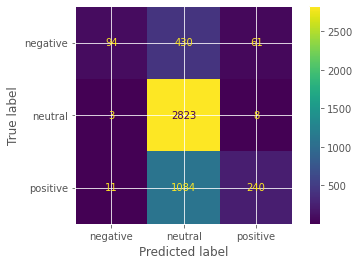

17.874791153271993


In [30]:
#results
print("cv results ", cv_results)
print(' ')
print("classification report")
print(sm.classification_report(y, predicted))
print(' ')
print("accuracy", sm.accuracy_score(y, predicted))
print(' ')
print("precision", sm.precision_score(y, predicted, average='macro'))
print(' ')
print("f1", sm.precision_score(y, predicted, average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(y, predicted, average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(y, predicted))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(y, predicted))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(y, predicted, labels=model_NB.classes_)
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_NB.classes_)
disp.plot()
plt.show()
end_time=time.time()
print((end_time-start_time)/60)

In [31]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = model_NB.fit(X,y)

# save the model to disk
filename = 'finalized_model.sav'
dump(model_used, open(filename, 'wb'))'''

"#Choose Multinomial NB as model ( to get app running, change later)\nmodel_used = model_NB.fit(X,y)\n\n# save the model to disk\nfilename = 'finalized_model.sav'\ndump(model_used, open(filename, 'wb'))"

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=['pos', 'neut', 'neg'])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    model_NB
)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/sk

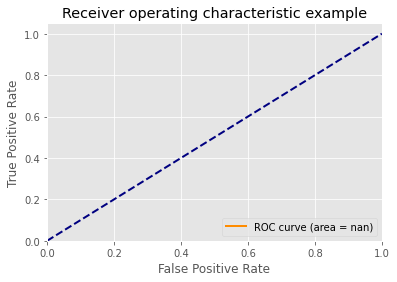

In [33]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [34]:
y_score
predicted = classifier.predict(X_test)
predicted

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [35]:
df_prob = pd.DataFrame(y_score, columns=['prob_yes', 'prob_neut', 'prob_neg'])
df_pred = pd.DataFrame(predicted, columns=['pred_yes', 'pred_neut', 'pred_neg'])
df_prob['pred_yes'] = df_pred['pred_yes']
df_prob['pred_neut'] = df_pred['pred_neut']
df_prob['pred_neg'] = df_pred['pred_neg']


In [36]:
y_score

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

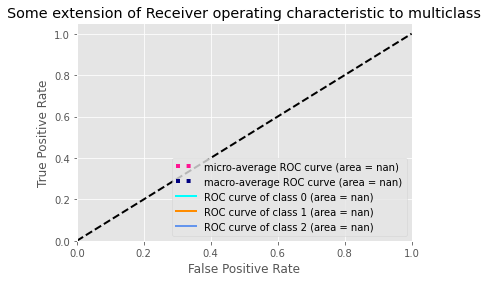

In [37]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [38]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = classifier.fit(X,y)

# save the model to disk
filename = 'finalized_onevsrest_model.sav'
dump(model_used, open(filename, 'wb'))'''

"#Choose Multinomial NB as model ( to get app running, change later)\nmodel_used = classifier.fit(X,y)\n\n# save the model to disk\nfilename = 'finalized_onevsrest_model.sav'\ndump(model_used, open(filename, 'wb'))"

In [39]:
vectorizer.get_feature_names_out()

array(['aalborg', 'aalborg northern', 'aaltonen', ..., 'ænekoski board',
       'ænekoski investment', 'ænekoski paper'], dtype=object)

In [40]:
## select observation
i = 1000
txt_instance = df['review'].iloc[i]
## check true value and predicted value
print("True:", y[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance,
             model_NB.predict_proba, num_features=3)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

KeyError: 'review'

In [ ]:
df_validate = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/cleaned_tweets_validation.csv')

In [ ]:
df_validate

In [ ]:
X_tweets = df_validate['tweet'].astype('string').array

In [ ]:
y_tweets = model_used.predict(X_tweets)

In [ ]:
y_tweets

In [ ]:
df_validate['predicted'] = y_tweets

In [ ]:
df_validate

In [ ]:
df_validate.to_csv('validate.csv')

In [ ]:
conditions = [(df_validate['polarity']=='positive')
              ,(df_validate['polarity']=='negative')
              , (df_validate['polarity']=='neutral')]
values = ['pos', 'neg', 'neut']
df_validate['polarity'] = np.select(conditions, values)
df_validate

In [ ]:
df_validate['polarity']==df_validate['predicted']

In [ ]:
#results

print("classification report")
print(sm.classification_report(df_validate['polarity'], df_validate['predicted']))
print(' ')
print("accuracy", sm.accuracy_score(df_validate['polarity'], df_validate['predicted']))
print(' ')
print("precision", sm.precision_score(df_validate['polarity'], df_validate['predicted'], average='macro'))
print(' ')
print("f1", sm.precision_score(df_validate['polarity'], df_validate['predicted'], average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(df_validate['polarity'], df_validate['predicted'], average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(df_validate['polarity'], df_validate['predicted']))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(df_validate['polarity'], df_validate['predicted']))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(df_validate['polarity'], df_validate['predicted'])
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm)